In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/sample_data/emails.csv'
emails_df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
emails_df.head()


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [2]:
from sklearn.preprocessing import StandardScaler

# Drop the "Email No." column as it is not needed for modeling
emails_df = emails_df.drop(columns=["Email No."])

# Check for missing values in the dataset
missing_values = emails_df.isnull().sum().sum()

# If there are missing values, fill them with 0
if missing_values > 0:
    emails_df = emails_df.fillna(0)

# Separate features and target variable
X = emails_df.drop(columns=["Prediction"])
y = emails_df["Prediction"]

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Confirm the preprocessing is complete by checking the dimensions of the scaled data
X_scaled.shape, y.shape


((5172, 3000), (5172,))

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the models
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
decision_tree_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(random_state=42)

# Dictionary to store results
model_results = {}

# Train and evaluate Logistic Regression
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
model_results['Logistic Regression'] = accuracy_score(y_test, y_pred_logistic)

# Train and evaluate Decision Tree Classifier
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)
model_results['Decision Tree'] = accuracy_score(y_test, y_pred_tree)

# Train and evaluate Support Vector Machine
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
model_results['SVM'] = accuracy_score(y_test, y_pred_svm)

# Present the results
model_results


{'Logistic Regression': 0.9671497584541063,
 'Decision Tree': 0.9217391304347826,
 'SVM': 0.9468599033816425}

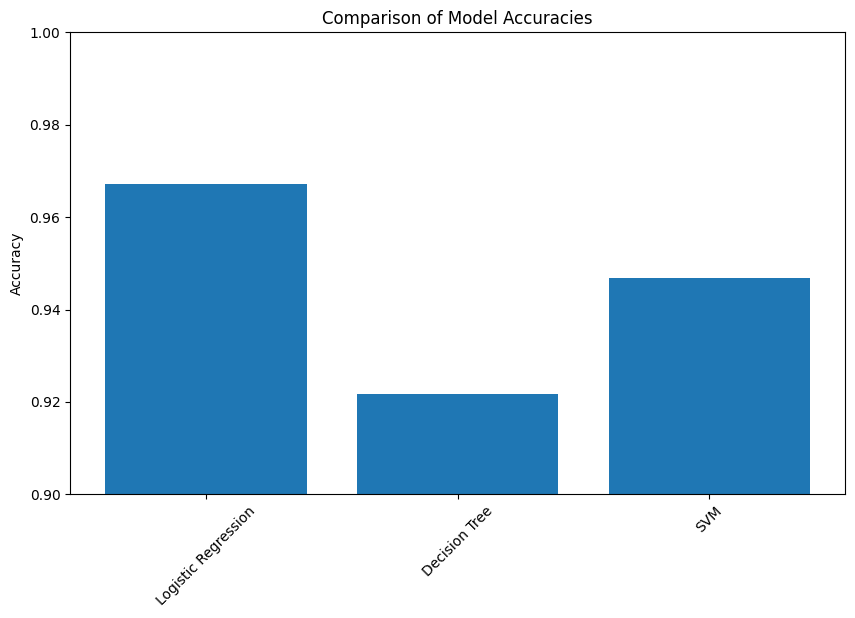

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Provided accuracy scores
model_results = {
    'Logistic Regression': 0.9671497584541063,
    'Decision Tree': 0.9217391304347826,
    'SVM': 0.9468599033816425
}

# Bar plot to compare accuracy
plt.figure(figsize=(10, 6))
plt.bar(model_results.keys(), model_results.values())
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1)  # Set limits for better visibility of differences
plt.xticks(rotation=45)
plt.show()


# Generating evaluation metrics and summary for each model
metrics_summary = {}

# Logistic Regression Metrics
metrics_summary['Logistic Regression'] = classification_report(y_test, y_pred_logistic, output_dict=True)

# Decision Tree Metrics
metrics_summary['Decision Tree'] = classification_report(y_test, y_pred_tree, output_dict=True)

# SVM Metrics
metrics_summary['SVM'] = classification_report(y_test, y_pred_svm, output_dict=True)


In [5]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

chosen_model = LogisticRegression(random_state=42, max_iter=1000)

# Perform cross-validation
cv_results = cross_validate(chosen_model, X_scaled, y, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])

# Print cross-validation results
print("Cross-Validation Results:")
print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.4f}")
print(f"Precision: {np.mean(cv_results['test_precision']):.4f}")
print(f"Recall: {np.mean(cv_results['test_recall']):.4f}")
print(f"F1 Score: {np.mean(cv_results['test_f1']):.4f}")

# Train the model on the full training data
chosen_model.fit(X_train, y_train)

# Make predictions
y_pred = chosen_model.predict(X_test)

# Evaluate the model
print("\nEvaluation on Test Data:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Cross-Validation Results:
Accuracy: 0.9503
Precision: 0.8834
Recall: 0.9580
F1 Score: 0.9185

Evaluation on Test Data:
Accuracy: 0.9671
Precision: 0.9119
Recall: 0.9797
F1 Score: 0.9446

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       739
           1       0.91      0.98      0.94       296

    accuracy                           0.97      1035
   macro avg       0.95      0.97      0.96      1035
weighted avg       0.97      0.97      0.97      1035



In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Scale data to ensure proper handling by algorithms
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define parameter grids for each model

# Logistic Regression
param_grid_logistic = {
    'penalty': ['l1', 'l2'],  # Common penalties
    'C': [0.1, 1, 10],  # Regularization strengths
    'solver': ['liblinear'],  # Compatible solver
    'max_iter': [200, 500]  # Reasonable iteration limits
}

# Decision Tree
param_grid_tree = {
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': [10, 20, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples per split
    'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf node
}

# Support Vector Machine
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Grid Search for Logistic Regression
logistic_grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid_logistic,
    cv=3,  # Use fewer folds for faster performance
    scoring='accuracy'
)
logistic_grid_search.fit(X_train, y_train)

# Grid Search for Decision Tree
tree_grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_tree,
    cv=3,
    scoring='accuracy'
)
tree_grid_search.fit(X_train, y_train)

# Grid Search for SVM
svm_grid_search = GridSearchCV(
    SVC(random_state=42),
    param_grid_svm,
    cv=3,
    scoring='accuracy'
)
svm_grid_search.fit(X_train, y_train)

# Display the best parameters and scores
print("Best Parameters and Scores from Grid Search:")
print("Logistic Regression Best Params:", logistic_grid_search.best_params_)
print("Logistic Regression Best Score:", logistic_grid_search.best_score_)
print("\nDecision Tree Best Params:", tree_grid_search.best_params_)
print("Decision Tree Best Score:", tree_grid_search.best_score_)
print("\nSVM Best Params:", svm_grid_search.best_params_)
print("SVM Best Score:", svm_grid_search.best_score_)

# Evaluate the best models on the test set
logistic_best = logistic_grid_search.best_estimator_
tree_best = tree_grid_search.best_estimator_
svm_best = svm_grid_search.best_estimator_

# Predictions
logistic_pred = logistic_best.predict(X_test)
tree_pred = tree_best.predict(X_test)
svm_pred = svm_best.predict(X_test)

# Print classification reports
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, logistic_pred))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, tree_pred))
print("\nSVM Classification Report:\n", classification_report(y_test, svm_pred))


Best Parameters and Scores from Grid Search:
Logistic Regression Best Params: {'C': 0.1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Best Score: 0.9605994682136814

Decision Tree Best Params: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Best Score: 0.9286922890983805

SVM Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
SVM Best Score: 0.9528643944887599

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       739
           1       0.93      0.98      0.95       296

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       739
           1       0

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define parameter distributions for each model

# Logistic Regression
param_dist_logistic = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

# Decision Tree
param_dist_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Support Vector Machine
param_dist_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Randomized Search for Logistic Regression
logistic_random_search = RandomizedSearchCV(
    LogisticRegression(random_state=42),
    param_distributions=param_dist_logistic,
    n_iter=10,  # Number of random samples
    cv=3,
    scoring='accuracy',
    random_state=42
)
logistic_random_search.fit(X_train, y_train)

# Randomized Search for Decision Tree
tree_random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist_tree,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    random_state=42
)
tree_random_search.fit(X_train, y_train)

# Randomized Search for SVM
svm_random_search = RandomizedSearchCV(
    SVC(random_state=42),
    param_distributions=param_dist_svm,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    random_state=42
)
svm_random_search.fit(X_train, y_train)

# Display the best parameters and scores
print("Best Parameters and Scores from Randomized Search:")
print("Logistic Regression Best Params:", logistic_random_search.best_params_)
print("Logistic Regression Best Score:", logistic_random_search.best_score_)
print("\nDecision Tree Best Params:", tree_random_search.best_params_)
print("Decision Tree Best Score:", tree_random_search.best_score_)
print("\nSVM Best Params:", svm_random_search.best_params_)
print("SVM Best Score:", svm_random_search.best_score_)

# Evaluate the best models on the test set
logistic_best_random = logistic_random_search.best_estimator_
tree_best_random = tree_random_search.best_estimator_
svm_best_random = svm_random_search.best_estimator_

# Predictions
logistic_pred_random = logistic_best_random.predict(X_test)
tree_pred_random = tree_best_random.predict(X_test)
svm_pred_random = svm_best_random.predict(X_test)

# Print classification reports
print("\nLogistic Regression Classification Report (Random Search):\n", classification_report(y_test, logistic_pred_random))
print("\nDecision Tree Classification Report (Random Search):\n", classification_report(y_test, tree_pred_random))
print("\nSVM Classification Report (Random Search):\n", classification_report(y_test, svm_pred_random))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best Parameters and Scores from Randomized Search:
Logistic Regression Best Params: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'C': 0.1}
Logistic Regression Best Score: 0.9605994682136814

Decision Tree Best Params: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'gini'}
Decision Tree Best Score: 0.9279671259366692

SVM Best Params: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}
SVM Best Score: 0.9528643944887599

Logistic Regression Classification Report (Random Search):
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       739
           1       0.93      0.98      0.95       296

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035


Decision Tree Classification Report (Random Search):
               precision    recall  f1-score   support

           0       0.95      0.94     


Logistic Regression Metrics:
Accuracy: 0.9729
Precision: 0.9323
Recall: 0.9764
F1 Score: 0.9538

Decision Tree Metrics:
Accuracy: 0.9227
Precision: 0.8576
Recall: 0.8750
F1 Score: 0.8662

SVM Metrics:
Accuracy: 0.9556
Precision: 0.9006
Recall: 0.9493
F1 Score: 0.9243


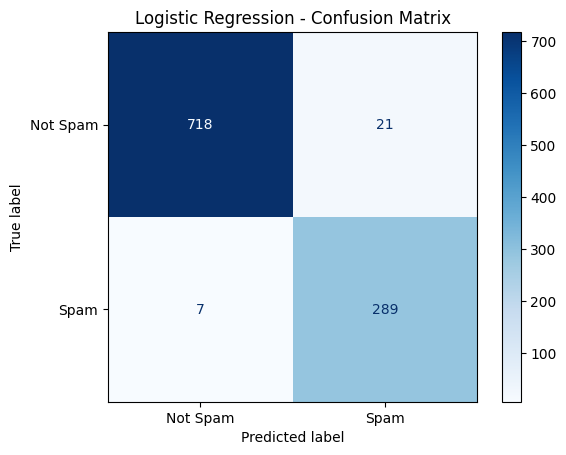

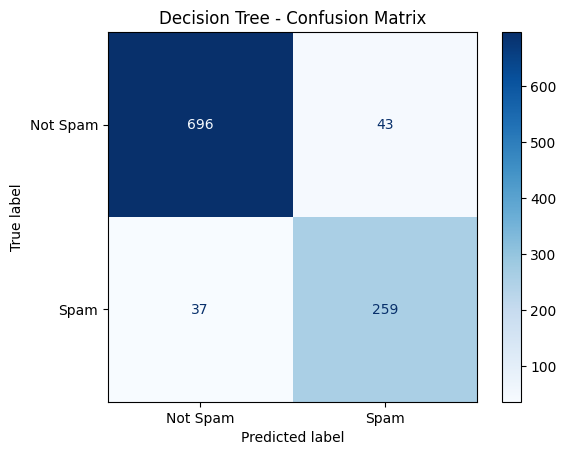

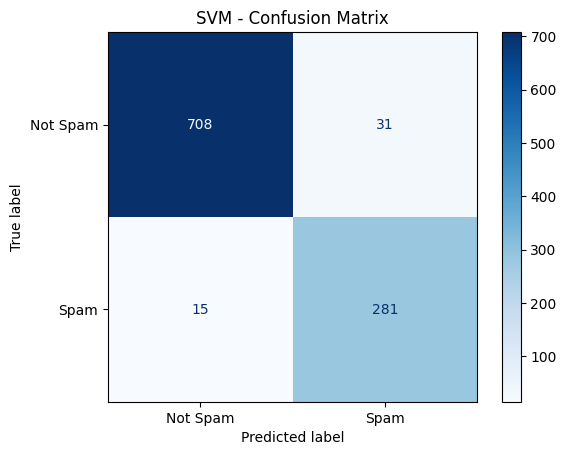

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluate Logistic Regression (Random Search)
logistic_accuracy = accuracy_score(y_test, logistic_pred_random)
logistic_precision = precision_score(y_test, logistic_pred_random)
logistic_recall = recall_score(y_test, logistic_pred_random)
logistic_f1 = f1_score(y_test, logistic_pred_random)
logistic_cm = confusion_matrix(y_test, logistic_pred_random)

# Evaluate Decision Tree (Random Search)
tree_accuracy = accuracy_score(y_test, tree_pred_random)
tree_precision = precision_score(y_test, tree_pred_random)
tree_recall = recall_score(y_test, tree_pred_random)
tree_f1 = f1_score(y_test, tree_pred_random)
tree_cm = confusion_matrix(y_test, tree_pred_random)

# Evaluate SVM (Random Search)
svm_accuracy = accuracy_score(y_test, svm_pred_random)
svm_precision = precision_score(y_test, svm_pred_random)
svm_recall = recall_score(y_test, svm_pred_random)
svm_f1 = f1_score(y_test, svm_pred_random)
svm_cm = confusion_matrix(y_test, svm_pred_random)

# Print Evaluation Metrics
print("\nLogistic Regression Metrics:")
print(f"Accuracy: {logistic_accuracy:.4f}")
print(f"Precision: {logistic_precision:.4f}")
print(f"Recall: {logistic_recall:.4f}")
print(f"F1 Score: {logistic_f1:.4f}")

print("\nDecision Tree Metrics:")
print(f"Accuracy: {tree_accuracy:.4f}")
print(f"Precision: {tree_precision:.4f}")
print(f"Recall: {tree_recall:.4f}")
print(f"F1 Score: {tree_f1:.4f}")

print("\nSVM Metrics:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1 Score: {svm_f1:.4f}")

# Plot Confusion Matrices
models = ['Logistic Regression', 'Decision Tree', 'SVM']
confusion_matrices = [logistic_cm, tree_cm, svm_cm]

for i, cm in enumerate(confusion_matrices):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Spam', 'Spam'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{models[i]} - Confusion Matrix")
    plt.show()


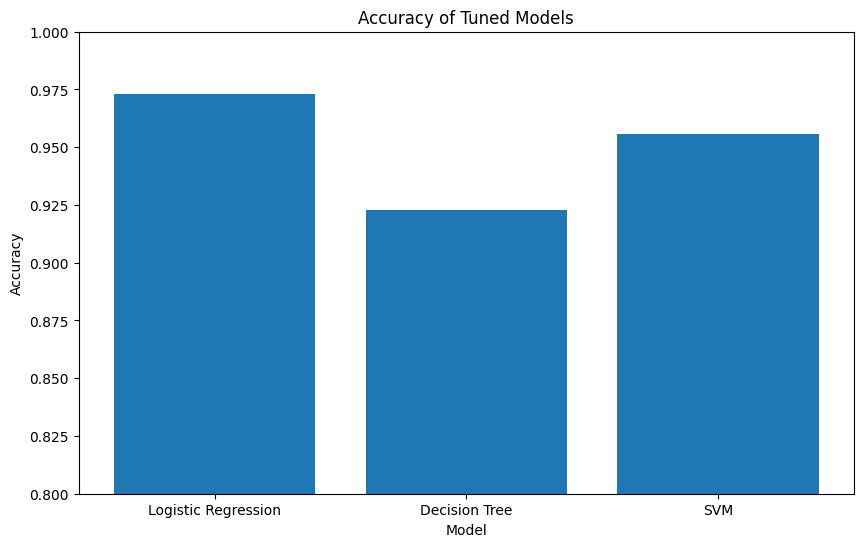

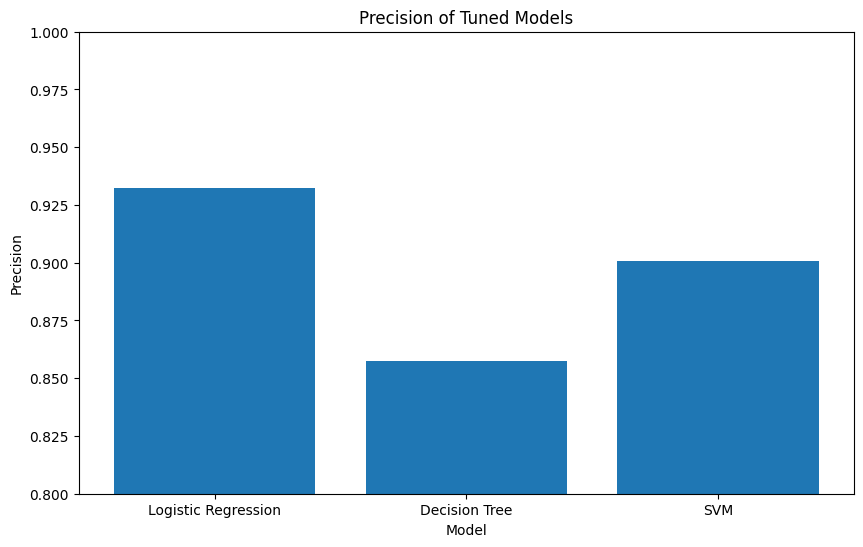

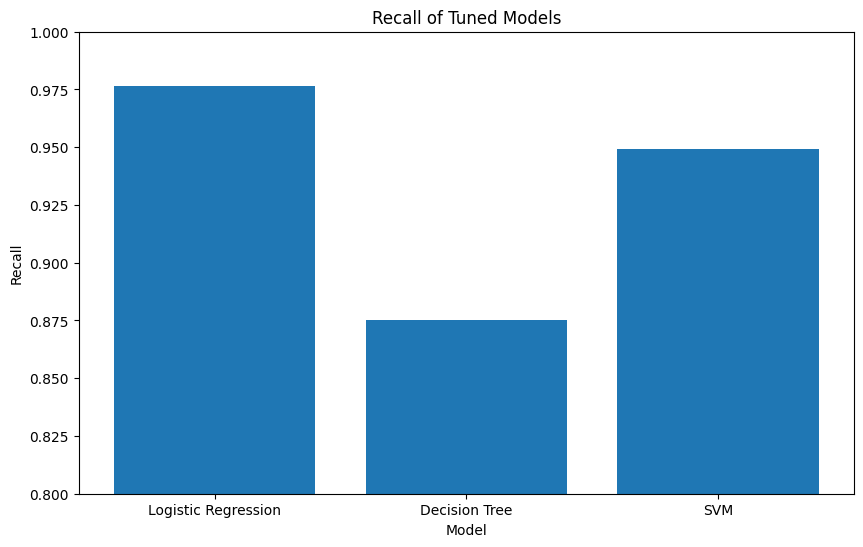

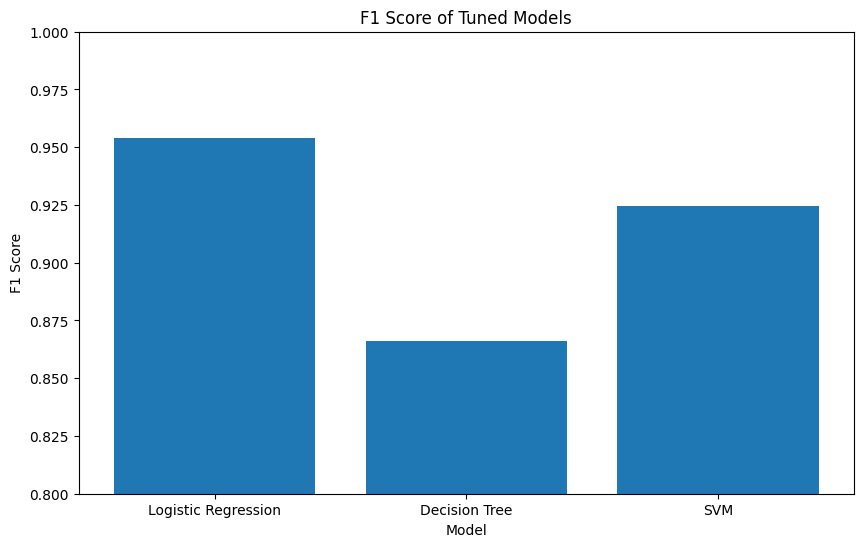

In [10]:
# Evaluation metrics for each model
metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'SVM'],
    'Accuracy': [logistic_accuracy, tree_accuracy, svm_accuracy],
    'Precision': [logistic_precision, tree_precision, svm_precision],
    'Recall': [logistic_recall, tree_recall, svm_recall],
    'F1 Score': [logistic_f1, tree_f1, svm_f1]
}

# Convert to a DataFrame for visualization
import pandas as pd
metrics_df = pd.DataFrame(metrics)

# Plot histograms for each metric
import matplotlib.pyplot as plt

# Accuracy Histogram
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['Accuracy'])
plt.title('Accuracy of Tuned Models')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0.8, 1.0)  # Adjust for better visibility
plt.show()

# Precision Histogram
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['Precision'])
plt.title('Precision of Tuned Models')
plt.ylabel('Precision')
plt.xlabel('Model')
plt.ylim(0.8, 1.0)
plt.show()

# Recall Histogram
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['Recall'])
plt.title('Recall of Tuned Models')
plt.ylabel('Recall')
plt.xlabel('Model')
plt.ylim(0.8, 1.0)
plt.show()

# F1 Score Histogram
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['F1 Score'])
plt.title('F1 Score of Tuned Models')
plt.ylabel('F1 Score')
plt.xlabel('Model')
plt.ylim(0.8, 1.0)
plt.show()

